<a href="https://colab.research.google.com/github/archishmanSingha/Superstore-Sales-Time-Series-Forecasting/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES FORECASTING**

## Importing Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Load the data

In [101]:
df= pd.read_csv("/content/train.csv")

## Exploratory Data Analysis(EDA) and Visualization

### Data Exploration

* df.head() - It shows the first 5 rows of the data.
* df.describe() - It shows a summary of the numerical data.
* df.info() - It has 9800 entries and it shows that Postal Code has 11 missing values.

In [102]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [103]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Data cleaning

Unnecassary columns have removed, null values in the postalcode column have been filled, and data type validation for ship date and order date has been done.

In [105]:
df.drop(['Row ID','Order ID','Customer ID','Customer Name'],axis=1,inplace=True)  #Unnecessary columns have removed

In [106]:
df[df.duplicated()]           #Checking for duplicate rows

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,23/04/2015,27/04/2015,Standard Class,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [107]:
df.drop_duplicates(inplace=True)          #Removing duplicate rows

In [108]:
df.isnull().sum()  #Checking for null values

Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [109]:
# show all the null row in the postalcode column 
df[df['Postal Code'].isnull()]

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [110]:
#all missed postal codes is in america which equal 05401
df['Postal Code'].fillna(5401,inplace=True)

In [111]:
df.isnull().sum() #Checking for null values

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
dtype: int64

In [112]:
#validate columns types 
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

<ipython-input-112-25bfecdf8994>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-112-25bfecdf8994>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [113]:
# Let's separate the year and put it into a separate column 
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Day'] = pd.DatetimeIndex(df['Order Date']).day

In [114]:
df['Day of Week'] = df['Order Date'].dt.strftime('%A')

In [115]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Day,Day of Week
0,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,11,Friday
1,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,11,Friday
2,2017-12-06,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,6,Wednesday
3,2016-11-10,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10,Thursday
4,2016-11-10,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10,Thursday


### Data Visualization

In [116]:
top_cities= df.groupby("City").sum().sort_values("Sales",ascending=False).head(15)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities

fig=px.bar(top_cities,x='City',y='Sales',title="Top 15 Cities",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

<ipython-input-116-71ea8070a1ff>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.




```
New York City has the highest Sales
```


In [117]:
fig = px.pie(df, values=np.ones(9799), names='Segment', title='Segment',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

regions= df.groupby("Region").sum().sort_values("Sales",ascending=False)
regions= regions[['Sales']].round(2)
regions.reset_index(inplace=True)

fig=px.pie(regions,names='Region',values='Sales',title="Regions Sales",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

<ipython-input-117-ae138383cc48>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.




```
Most Orders were from consumers and Most Sales was from the West Region
```


In [118]:
fig = px.pie(df, values=np.ones(9799), names='Category', title='Category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

fig = px.pie(df, values=np.ones(9799), names='Sub-Category', title='Sub Category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()




```
Most orders was of Office Suppliers and of Office Binders
```



<ipython-input-119-26adcf699b7d>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



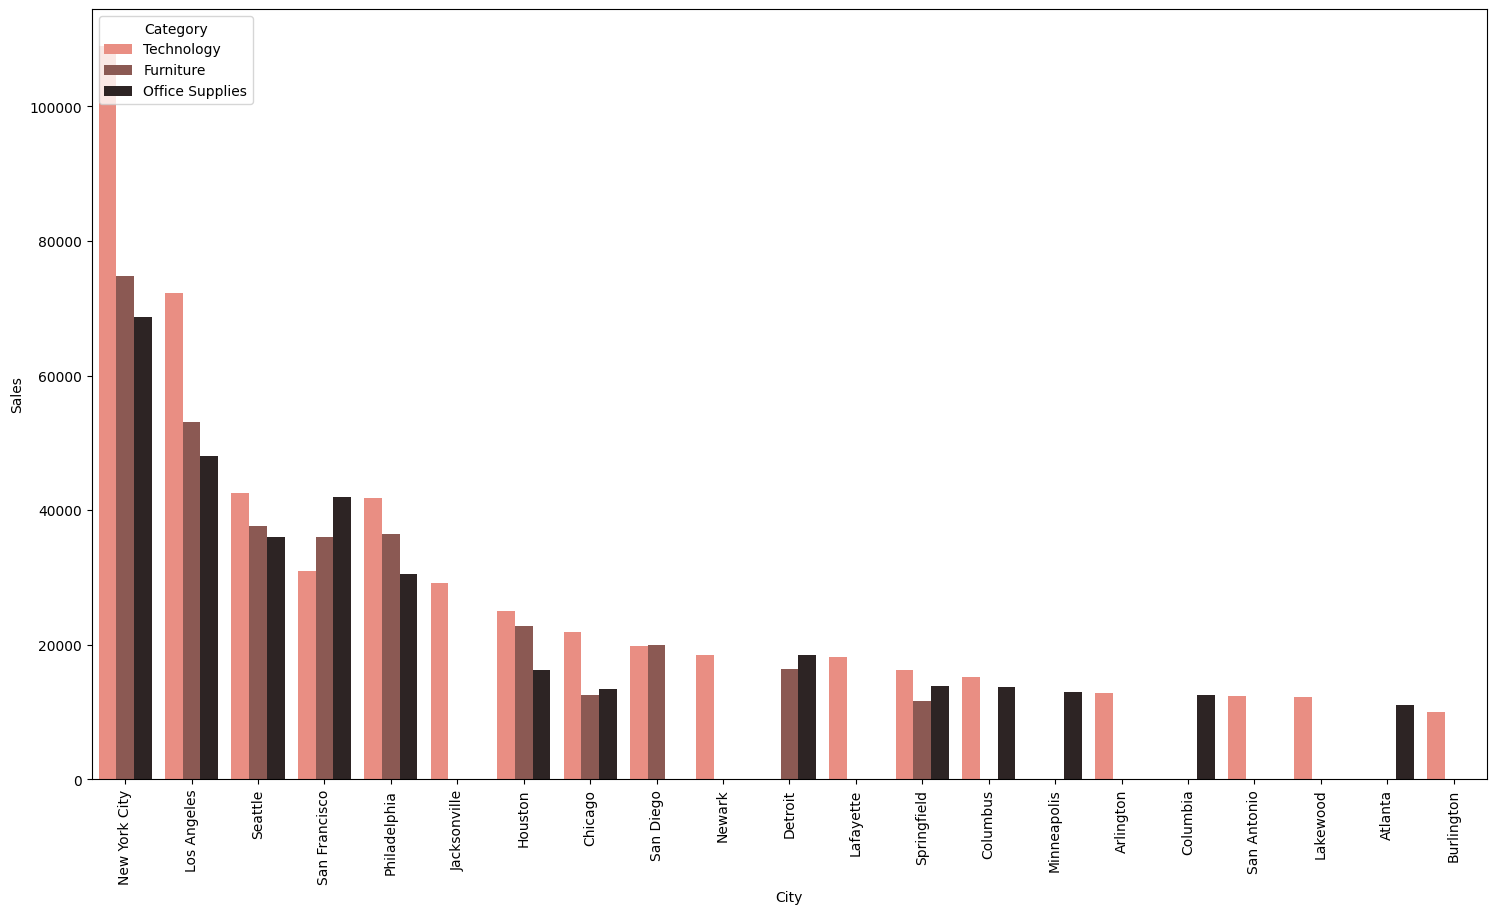

In [119]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Category"]).sum().sort_values("Sales",ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales',hue='Category',data=top_cities,palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()



```
Common products categories and segments in the top 10 consuming cities.
```



<Figure size 640x480 with 0 Axes>

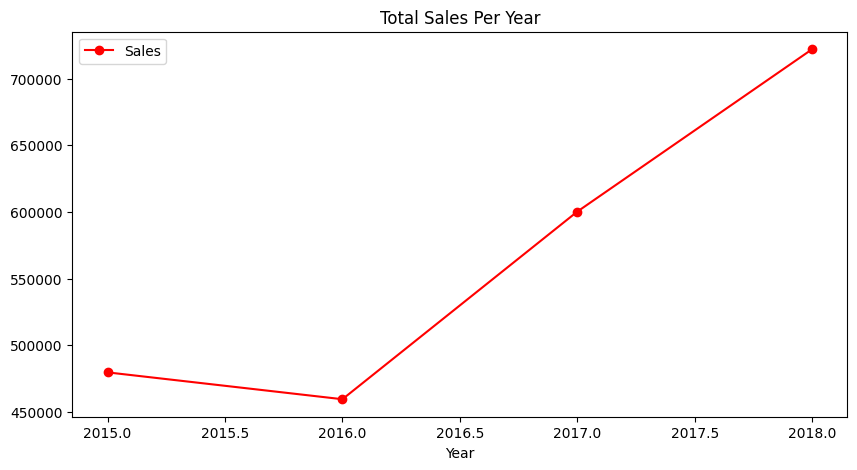

<Figure size 640x480 with 0 Axes>

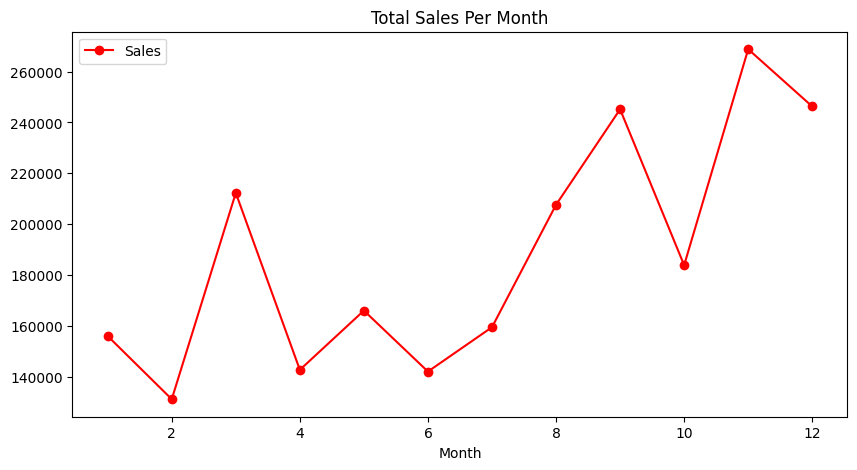

<Figure size 640x480 with 0 Axes>

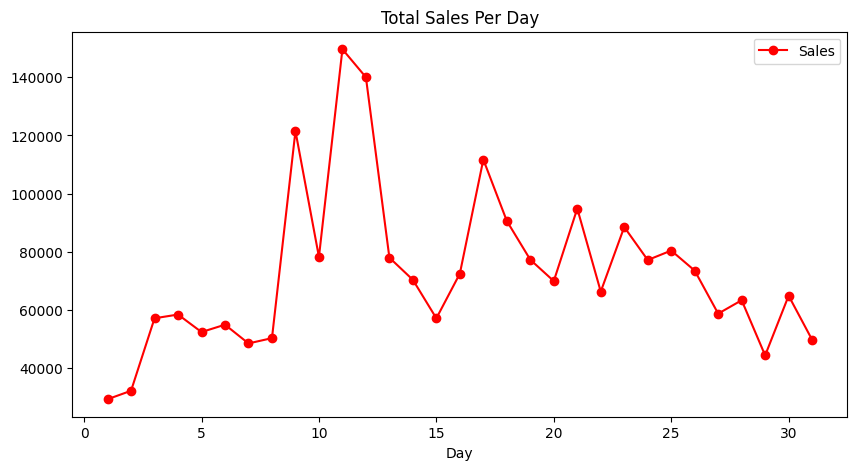

<Figure size 640x480 with 0 Axes>

In [120]:
axis = df.groupby('Year')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Year')
plt.figure()

axis = df.groupby('Month')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Month')
plt.figure()

axis = df.groupby('Day')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Day')
plt.figure()





```
Highest Sale recroded in 2018,with November month having the highest sale year on year, and second week of the month having the best sales.
```




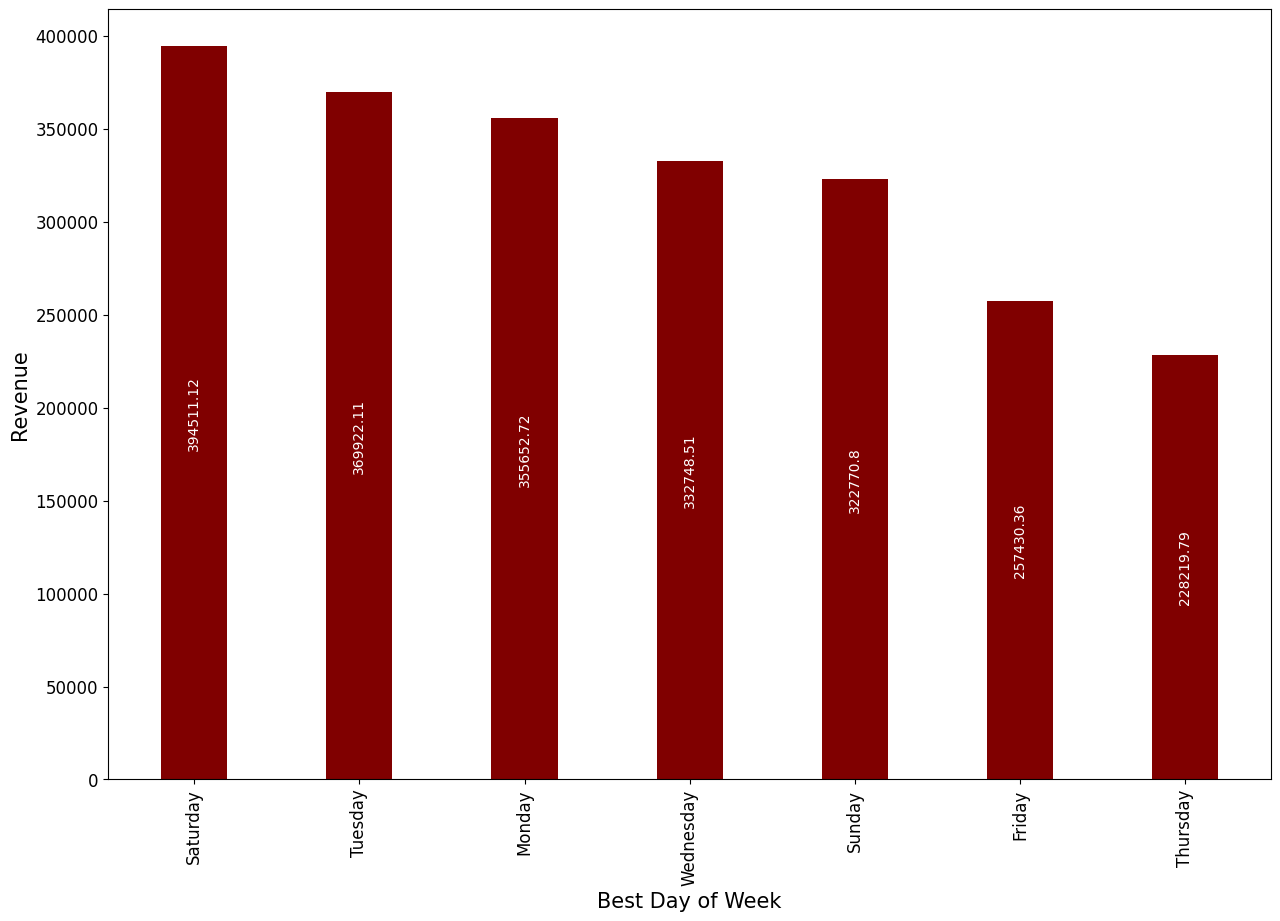

In [121]:
best_dayofweek = df.pivot_table(values = "Sales" , index = "Day of Week" , aggfunc = "sum")
best_dayofweek = best_dayofweek.sort_values(by=['Sales'], ascending=False).head(20)
best_dayofweek.reset_index(inplace=True) 
best_dayofweek['Sales']=best_dayofweek['Sales'].round(2)


fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(best_dayofweek['Day of Week'],best_dayofweek['Sales'] , color ='maroon',
        width = 0.4)
 
plt.xlabel("Best Day of Week",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_dayofweek['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='white')
plt.show()



```
Saturday recording the best day of week for generating revenue
```



## Train Prophet Model

In [122]:
from prophet import Prophet

In [123]:
sales_prophet_df = df.rename(columns={'Order Date':'ds', 'Sales':'y'})

In [124]:
m = Prophet()
m.fit(sales_prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplpniam40/fu4d0fyg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplpniam40/r263ihby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22959', 'data', 'file=/tmp/tmplpniam40/fu4d0fyg.json', 'init=/tmp/tmplpniam40/r263ihby.json', 'output', 'file=/tmp/tmplpniam40/prophet_modelsah04ah_/prophet_model-20230610011808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [125]:
# Forcasting into the future
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [126]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,220.777249,-580.623237,1022.494509,220.777249,220.777249,37.202781,37.202781,37.202781,0.463298,0.463298,0.463298,36.739483,36.739483,36.739483,0.0,0.0,0.0,257.980029
1,2015-01-03,220.903706,-573.707722,1033.715675,220.903706,220.903706,53.618618,53.618618,53.618618,17.936458,17.936458,17.936458,35.682160,35.682160,35.682160,0.0,0.0,0.0,274.522324
2,2015-01-04,221.030164,-574.944865,958.994834,221.030164,221.030164,7.895791,7.895791,7.895791,-26.389451,-26.389451,-26.389451,34.285242,34.285242,34.285242,0.0,0.0,0.0,228.925955
3,2015-01-06,221.283079,-593.331676,1046.032440,221.283079,221.283079,11.869419,11.869419,11.869419,-18.910279,-18.910279,-18.910279,30.779699,30.779699,30.779699,0.0,0.0,0.0,233.152499
4,2015-01-07,221.409537,-524.323228,1148.171213,221.409537,221.409537,42.437673,42.437673,42.437673,13.591088,13.591088,13.591088,28.846585,28.846585,28.846585,0.0,0.0,0.0,263.847210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2019-01-25,219.834587,-522.663366,1122.933927,219.703174,219.964418,53.239754,53.239754,53.239754,0.463298,0.463298,0.463298,52.776456,52.776456,52.776456,0.0,0.0,0.0,273.074342
1256,2019-01-26,219.815661,-486.968147,1083.168578,219.676213,219.957257,74.851056,74.851056,74.851056,17.936458,17.936458,17.936458,56.914599,56.914599,56.914599,0.0,0.0,0.0,294.666718
1257,2019-01-27,219.796735,-534.536874,1065.136157,219.637091,219.956508,34.370814,34.370814,34.370814,-26.389451,-26.389451,-26.389451,60.760264,60.760264,60.760264,0.0,0.0,0.0,254.167549
1258,2019-01-28,219.777809,-535.372239,1111.694617,219.595257,219.954900,58.652857,58.652857,58.652857,-5.525806,-5.525806,-5.525806,64.178664,64.178664,64.178664,0.0,0.0,0.0,278.430667


In [127]:

predicted_values = forecast['yhat_upper'][-7:]  

# Creating a dataframe with the predicted values and corresponding timestamps
predicted_df = pd.DataFrame({'Timestamp': future['ds'], 'Prediction': predicted_values})


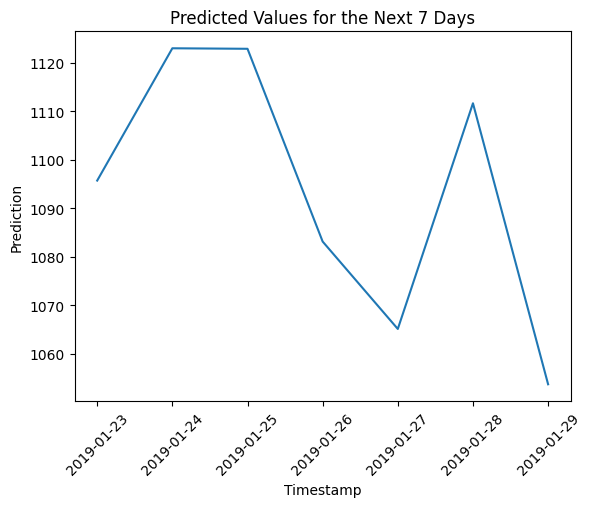

In [128]:
plt.plot(predicted_df['Timestamp'], predicted_df['Prediction'])


plt.xlabel('Timestamp')
plt.ylabel('Prediction')
plt.title('Predicted Values for the Next 7 Days')


plt.xticks(rotation=45)

plt.show()